# Investigating the NSL-KDD dataset
This notebook is designed for a foundational exploration of the NSL-KDD dataset, with the following objectives:

1. **Understand the Basics of the Dataset**: To start with, I aim to get a basic grasp of the dataset's structure and content.
2. **Examine its Utility for Anomaly Detection**: I will explore how the dataset can be leveraged to identify network anomalies or cyber attacks.
3. **Introduction to Machine Learning Model Building**: I will touch upon the essential concepts of creating machine learning models.

In [4]:
#loading and importing data 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Essential Python Libraries for this dataset
### Data Manipulation & Visualization
- **Numpy** (`numpy`): Handles numerical data efficiently with support for arrays and matrices.
- **Pandas** (`pandas`): Offers data structures and tools for effective data manipulation and analysis.
- **Matplotlib** (`matplotlib`) & **Seaborn** (`seaborn`): Used for data visualization, with Seaborn providing a high-level interface for drawing statistical graphics.

### Machine Learning Models
- **Scikit-learn** (`sklearn`): A comprehensive library that includes:
  - **Model Classes**: 
    - `RandomForestClassifier`
    - `KNeighborsClassifier`
    - `LogisticRegression` for different classification tasks.
  - **Processing Tools**: 
    - `LabelEncoder` for encoding labels
    - `train_test_split` for splitting data
    - `cross_val_score` for model evaluation.
  - **Metrics**: 
    - `mean_absolute_error`
    - `accuracy_score`
    - `confusion_matrix` for performance assessment.


These libraries collectively support the development, evaluation, and deployment of machine learning models, ensuring efficient data handling, model training, and performance evaluation. evaluation.

# Data Extraction

I will begin by retrieving our dataset. Given that there are multiple dataset options available, I will construct several paths and utilize comments to select the specific dataset we wish to work with.
The dataset lacks column names, so I will also proceed to assign them.

In [5]:
df=pd.read_csv('./archive/KDDTrain+.txt')
test_df=pd.read_csv('./archive/KDDTest+.txt')

# add the column labels from https://github.com/Jehuty4949/NSL_KDD
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])


df.columns = columns
test_df.columns = columns

In [6]:
df

duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0              0           udp     other   SF        146          0     0   
1              0           tcp   private   S0          0          0     0   
2              0           tcp      http   SF        232       8153     0   
3              0           tcp      http   SF        199        420     0   
4              0           tcp   private  REJ          0          0     0   
...          ...           ...       ...  ...        ...        ...   ...   
125967         0           tcp   private   S0          0          0     0   
125968         8           udp   private   SF        105        145     0   
125969         0           tcp      smtp   SF       2231        384     0   
125970         0           tcp    klogin   S0          0          0     0   
125971         0           tcp  ftp_data   SF        151          0     0   

        wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0                    0       0    0  ...                    0.00   
1                    0       0    0  ...                    0.10   
2                    0       0    0  ...                    1.00   
3                    0       0    0  ...                    1.00   
4                    0       0    0  ...                    0.07   
...                ...     ...  ...  ...                     ...   
125967               0       0    0  ...                    0.10   
125968               0       0    0  ...                    0.96   
125969               0       0    0  ...                    0.12   
125970               0       0    0  ...                    0.03   
125971               0       0    0  ...                    0.30   

        dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                         0.60                         0.88   
1                         0.05                         0.00   
2                         0.00                         0.03   
3                         0.00                         0.00   
4                         0.07                         0.00   
...                        ...                          ...   
125967                    0.06                         0.00   
125968                    0.01                         0.01   
125969                    0.06                         0.00   
125970                    0.05                         0.00   
125971                    0.03                         0.30   

        dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                              0.00                  0.00   
1                              0.00                  1.00   
2                              0.04                  0.03   
3                              0.00                  0.00   
4                              0.00                  0.00   
...                             ...                   ...   
125967                         0.00                  1.00   
125968                         0.00                  0.00   
125969                         0.00                  0.72   
125970                         0.00                  1.00   
125971                         0.00                  0.00   

        dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                           0.00                  0.00   
1                           1.00                  0.00   
2                           0.01                  0.00   
3                           0.00                  0.00   
4                           0.00                  1.00   
...                          ...                   ...   
125967                      1.00                  0.00   
125968                      0.00                  0.00   
125969                      0.00                  0.01   
125970                      1.00                  0.00   
125971                      0.00                  0.00   

        dst_host_srv_rerror_rate   attack  level  
0                           

## Data Transformation
### Binarizing the "attack" Column

The code snippet provided below is focused on transforming the "attack" column in the dataframes `df` and `test_df` into a binary format. This transformation is crucial for simplifying the classification process in machine learning models by reducing multi-class labels into a binary format.

In [7]:
# I want the attack column to be binary. Therefore, I will keep the normal traffic as "normal" and change everything else to "attack"

df["attack_binary"]=df.attack.map(lambda a: "normal" if a == 'normal' else "attack")
df.drop('attack',axis=1,inplace=True)

test_df["attack_binary"]=test_df.attack.map(lambda a: "normal" if a == 'normal' else "attack")
test_df.drop('attack',axis=1,inplace=True)

In [8]:
df

duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0              0           udp     other   SF        146          0     0   
1              0           tcp   private   S0          0          0     0   
2              0           tcp      http   SF        232       8153     0   
3              0           tcp      http   SF        199        420     0   
4              0           tcp   private  REJ          0          0     0   
...          ...           ...       ...  ...        ...        ...   ...   
125967         0           tcp   private   S0          0          0     0   
125968         8           udp   private   SF        105        145     0   
125969         0           tcp      smtp   SF       2231        384     0   
125970         0           tcp    klogin   S0          0          0     0   
125971         0           tcp  ftp_data   SF        151          0     0   

        wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0                    0       0    0  ...                    0.00   
1                    0       0    0  ...                    0.10   
2                    0       0    0  ...                    1.00   
3                    0       0    0  ...                    1.00   
4                    0       0    0  ...                    0.07   
...                ...     ...  ...  ...                     ...   
125967               0       0    0  ...                    0.10   
125968               0       0    0  ...                    0.96   
125969               0       0    0  ...                    0.12   
125970               0       0    0  ...                    0.03   
125971               0       0    0  ...                    0.30   

        dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                         0.60                         0.88   
1                         0.05                         0.00   
2                         0.00                         0.03   
3                         0.00                         0.00   
4                         0.07                         0.00   
...                        ...                          ...   
125967                    0.06                         0.00   
125968                    0.01                         0.01   
125969                    0.06                         0.00   
125970                    0.05                         0.00   
125971                    0.03                         0.30   

        dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                              0.00                  0.00   
1                              0.00                  1.00   
2                              0.04                  0.03   
3                              0.00                  0.00   
4                              0.00                  0.00   
...                             ...                   ...   
125967                         0.00                  1.00   
125968                         0.00                  0.00   
125969                         0.00                  0.72   
125970                         0.00                  1.00   
125971                         0.00                  0.00   

        dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                           0.00                  0.00   
1                           1.00                  0.00   
2                           0.01                  0.00   
3                           0.00                  0.00   
4                           0.00                  1.00   
...                          ...                   ...   
125967                      1.00                  0.00   
125968                      0.00                  0.00   
125969                      0.00                  0.01   
125970                      1.00                  0.00   
125971                      0.00                  0.00   

        dst_host_srv_rerror_rate  level  attack_binary  
0                     

## Data Profiling

Let's start with some initial exploration of the dataset. The first step is to create a simple table categorizing attacks by protocol. In the analysis of network traffic, the protocol serves as a basic means to segment our data into initial categories. At this stage, 'normal' traffic is included in the set to serve as a baseline for comparison.

In [9]:
# use a crosstab to get attack vs protocol
attack_vs_protocol = pd.crosstab(df.attack_binary, df.protocol_type)
attack_vs_protocol

protocol_type  icmp    tcp    udp
attack_binary                    
attack         6982  49089   2559
normal         1309  53599  12434

## Encoding Categorical Features

I will utilize `LabelEncoder` from the `sklearn.preprocessing` module to convert categorical text data into model-understandable numerical data. This encoding is essential for the following features:
- `protocol_type`
- `service`
- `flag`
- `attack_binary`

Each of these features is transformed from a string to a unique integer.

## Data Splitting

The dataset is split into training and testing subsets:
- `x_train` and `x_test`: These contain all the features except for the target feature `attack_binary`.
- `y_train` and `y_test`: These are the labels for training and testing, respectively, containing the values of `attack_binary`.

## Feature Selection Using Mutual Information

Mutual information is computed between each feature and the target (`attack_binary`) to determine the dependency of the target on the features. This metric helps in selecting the most informative features.

### Top 15 Features Selection

Using `SelectKBest` with `mutual_info_classif`, I select the top 15 features that have the highest mutual information scores with the target. This subset of features will then be used for further modeling.


In [10]:
# Importing necessary library for Label Encoding
from sklearn import preprocessing
# Creating a label encoder object
le=preprocessing.LabelEncoder()


# List of categorical columns to encode
clm=['protocol_type', 'service', 'flag', 'attack_binary']
# List of categorical columns to encode
for x in clm:
    df[x]=le.fit_transform(df[x])
    test_df[x]=le.fit_transform(test_df[x])
    
df


duration  protocol_type  service  flag  src_bytes  dst_bytes  land  \
0              0              2       44     9        146          0     0   
1              0              1       49     5          0          0     0   
2              0              1       24     9        232       8153     0   
3              0              1       24     9        199        420     0   
4              0              1       49     1          0          0     0   
...          ...            ...      ...   ...        ...        ...   ...   
125967         0              1       49     5          0          0     0   
125968         8              2       49     9        105        145     0   
125969         0              1       54     9       2231        384     0   
125970         0              1       30     5          0          0     0   
125971         0              1       20     9        151          0     0   

        wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0                    0       0    0  ...                    0.00   
1                    0       0    0  ...                    0.10   
2                    0       0    0  ...                    1.00   
3                    0       0    0  ...                    1.00   
4                    0       0    0  ...                    0.07   
...                ...     ...  ...  ...                     ...   
125967               0       0    0  ...                    0.10   
125968               0       0    0  ...                    0.96   
125969               0       0    0  ...                    0.12   
125970               0       0    0  ...                    0.03   
125971               0       0    0  ...                    0.30   

        dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                         0.60                         0.88   
1                         0.05                         0.00   
2                         0.00                         0.03   
3                         0.00                         0.00   
4                         0.07                         0.00   
...                        ...                          ...   
125967                    0.06                         0.00   
125968                    0.01                         0.01   
125969                    0.06                         0.00   
125970                    0.05                         0.00   
125971                    0.03                         0.30   

        dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                              0.00                  0.00   
1                              0.00                  1.00   
2                              0.04                  0.03   
3                              0.00                  0.00   
4                              0.00                  0.00   
...                             ...                   ...   
125967                         0.00                  1.00   
125968                         0.00                  0.00   
125969                         0.00                  0.72   
125970                         0.00                  1.00   
125971                         0.00                  0.00   

        dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                           0.00                  0.00   
1                           1.00                  0.00   
2                           0.01                  0.00   
3                           0.00                  0.00   
4                           0.00                  1.00   
...                          ...                   ...   
125967                      1.00                  0.00   
125968                      0.00                  0.00   
125969                      0.00                  0.01   
125970                      1.00                  0.00   
125971                      0.00                  0.00   

        dst_host_srv_rerror_rate  level  attack_binary  
0         

In [11]:
# Splitting the dataset into features and labels for training and testing
x_train=df.drop('attack_binary',axis=1)
y_train=df["attack_binary"]

x_test=test_df.drop('attack_binary',axis=1)
y_test=test_df["attack_binary"]

In [24]:
# Import mutual information classifier to evaluate feature importance
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(x_train, y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train.columns
mutual_info = mutual_info.sort_values(ascending=False)
mutual_info

src_bytes                      0.566396
service                        0.468618
dst_bytes                      0.440064
same_srv_rate                  0.369244
flag                           0.368950
diff_srv_rate                  0.357635
dst_host_srv_count             0.335226
dst_host_same_srv_rate         0.310637
logged_in                      0.292657
dst_host_serror_rate           0.286156
dst_host_diff_srv_rate         0.284316
dst_host_srv_serror_rate       0.283900
serror_rate                    0.278472
srv_serror_rate                0.269268
count                          0.264724
dst_host_srv_diff_host_rate    0.188634
level                          0.155320
dst_host_count                 0.144749
dst_host_same_src_port_rate    0.132137
srv_diff_host_rate             0.101122
srv_count                      0.063164
dst_host_srv_rerror_rate       0.061359
protocol_type                  0.055364
rerror_rate                    0.042157
dst_host_rerror_rate           0.036913


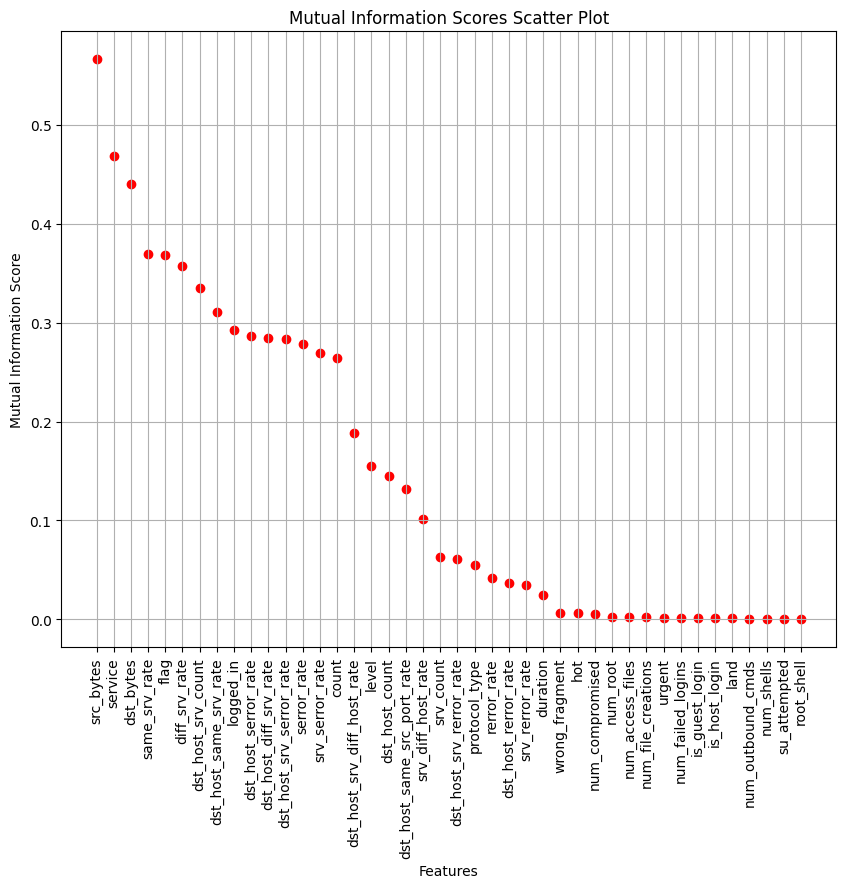

In [25]:
plt.figure(figsize=(10, 8))
plt.scatter(mutual_info.index, mutual_info.values, color='red')
plt.title('Mutual Information Scores Scatter Plot')
plt.xlabel('Features')
plt.ylabel('Mutual Information Score')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


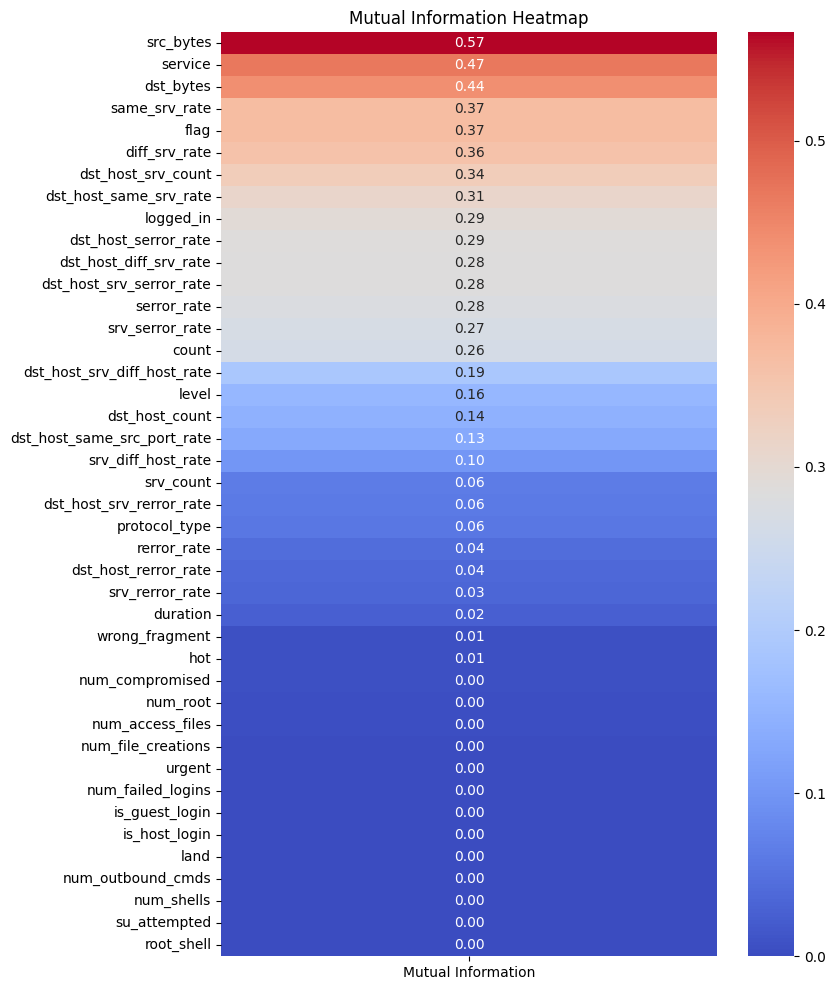

In [27]:
# Convert the mutual information series into a dataframe for heatmap compatibility
mi_df = pd.DataFrame(mutual_info)
mi_df.columns = ['Mutual Information']

plt.figure(figsize=(8, 12))
sns.heatmap(mi_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mutual Information Heatmap')
plt.show()

In [28]:
# Selecting the top 15 most informative features
from sklearn.feature_selection import SelectKBest
sel_five_cols = SelectKBest(mutual_info_classif, k=15)
sel_five_cols.fit(x_train, y_train)
x_train.columns[sel_five_cols.get_support()]

Index(['service', 'flag', 'src_bytes', 'dst_bytes', 'logged_in', 'count',
       'serror_rate', 'srv_serror_rate', 'same_srv_rate', 'diff_srv_rate',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate'],
      dtype='object')

In [29]:
col=['service', 'flag', 'src_bytes', 'dst_bytes', 'logged_in', 'count',
       'serror_rate', 'srv_serror_rate', 'same_srv_rate', 'diff_srv_rate',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate']
x_train=x_train[col]
x_test=x_test[col]

## Feature Selection for Model Training and Testing

The code below specifies a subset of features that are deemed important for the machine learning models I am developing. These features are selected based on their potential relevance to the modeling task, which might be inferred from domain expertise, data exploration, or prior statistical analysis.

### Selected Features

I define a list `col` that includes:

- **Network Traffic Characteristics**: `service`, `flag`
- **Traffic Volume Metrics**: `src_bytes`, `dst_bytes`
- **Connection Details**: `logged_in`, `count`
- **Error Rates and Connection Rates**:
  - `serror_rate`, `srv_serror_rate`: Server error rates from different perspectives.
  - `same_srv_rate`, `diff_srv_rate`: Rate of same-service and different-service connections.
- **Host-based Features**:
  - `dst_host_srv_count`: Count of connections to host and specific services on the host.
  - `dst_host_same_srv_rate`, `dst_host_diff_srv_rate`: Rates of same and different service connections at the host level.
  - `dst_host_serror_rate`, `dst_host_srv_serror_rate`: Error rates observed by the host and its services.

## Scaling Features with MinMaxScaler

In order to ensure that my machine learning models perform optimally, it is crucial to scale the feature data. Scaling helps in normalizing the data within a particular range and speeds up the calculations in an algorithm. Here, we I `MinMaxScaler` from the `sklearn.preprocessing` module, which scales each feature to a given range, typically between 0 and 1.

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train= scaler.fit_transform(x_train)
x_test= scaler.fit_transform(x_test)

##  Model Development

### 1. Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression()

In [32]:
logreg_model.fit(x_train, y_train)

LogisticRegression()

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

In [34]:
# Predictions on the test set
y_pred_logreg = logreg_model.predict(x_test)

# Evaluation metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_logreg))
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))

Confusion Matrix:
[[7405 5427]
 [ 745 8966]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.58      0.71     12832
           1       0.62      0.92      0.74      9711

    accuracy                           0.73     22543
   macro avg       0.77      0.75      0.72     22543
weighted avg       0.79      0.73      0.72     22543

Accuracy: 0.726212127933283


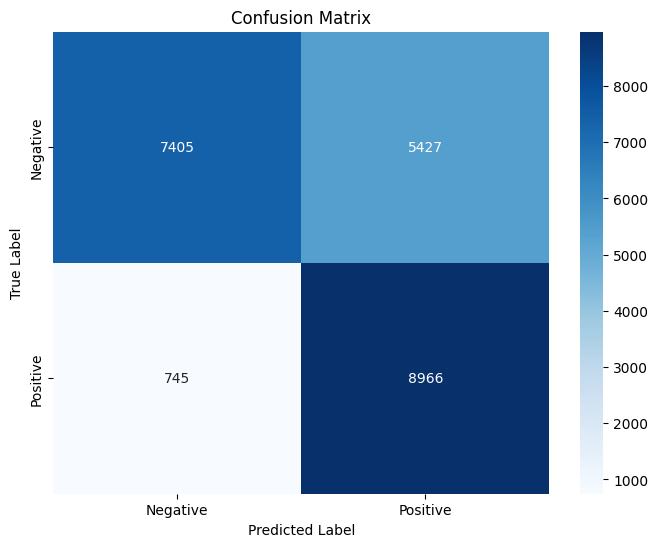

In [35]:
# Plotting the confusion matrix
cm = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [36]:
accuracy_logreg = accuracy_score(y_pred_logreg, y_test)
precision_logreg = precision_score(y_pred_logreg, y_test)
recall_logreg = recall_score(y_pred_logreg, y_test)
print(f"Accuracy: {accuracy_logreg}")
print(f"Precision: {precision_logreg}")
print(f"Recall: {recall_logreg}")

Accuracy: 0.726212127933283
Precision: 0.923282875090104
Recall: 0.6229417077746127


### 2. Random Forest Classifier

In [37]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()

In [38]:
rf_model.fit(x_train, y_train)

RandomForestClassifier()

In [39]:
# Predictions on the test set
y_pred_rf = rf_model.predict(x_test)

# Evaluation metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

Confusion Matrix:
[[7449 5383]
 [ 284 9427]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.58      0.72     12832
           1       0.64      0.97      0.77      9711

    accuracy                           0.75     22543
   macro avg       0.80      0.78      0.75     22543
weighted avg       0.82      0.75      0.74     22543

Accuracy: 0.7486137603690725


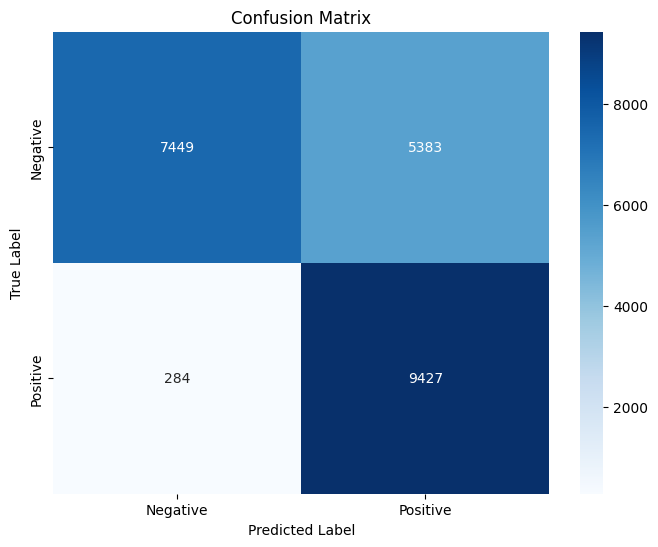

In [40]:
# Plotting the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [41]:
accuracy_rf = accuracy_score(y_pred_rf, y_test)
precision_rf = precision_score(y_pred_rf, y_test)
recall_rf= recall_score(y_pred_rf, y_test)
print(f"Accuracy: {accuracy_rf}")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")

Accuracy: 0.7486137603690725
Precision: 0.9707548141283081
Recall: 0.636529372045915


### 3. Decision Trees

In [42]:
# Decision Trees
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(max_depth=5)

In [43]:
dt_classifier.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [44]:
# Predictions on the test set
y_pred_dt_classifier = dt_classifier.predict(x_test)

# Evaluation metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt_classifier))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt_classifier))
print("Accuracy:", accuracy_score(y_test, y_pred_dt_classifier))

Confusion Matrix:
[[9707 3125]
 [1007 8704]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.76      0.82     12832
           1       0.74      0.90      0.81      9711

    accuracy                           0.82     22543
   macro avg       0.82      0.83      0.82     22543
weighted avg       0.83      0.82      0.82     22543

Accuracy: 0.8167058510402342


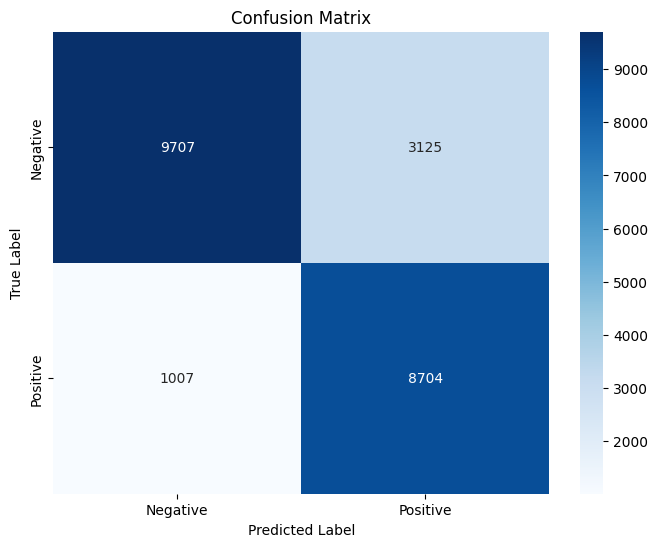

In [45]:
# Plotting the confusion matrix
cm_dt_classifier = confusion_matrix(y_test, y_pred_dt_classifier)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt_classifier, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [46]:
accuracy_dt_classifier= accuracy_score(y_pred_dt_classifier, y_test)
precision_dt_classifier = precision_score(y_pred_dt_classifier, y_test)
recall_dt_classifier= recall_score(y_pred_dt_classifier, y_test)
print(f"Accuracy: {accuracy_dt_classifier}")
print(f"Precision: {precision_dt_classifier}")
print(f"Recall: {recall_dt_classifier}")

Accuracy: 0.8167058510402342
Precision: 0.8963031613634024
Recall: 0.7358187505283625


### 4. Naive Bayes

In [47]:
from sklearn.naive_bayes import GaussianNB
NaiveBayes = GaussianNB()

In [48]:
NaiveBayes.fit(x_train, y_train)

GaussianNB()

In [49]:
# Predictions on the test set
y_pred_NaiveBayes = NaiveBayes.predict(x_test)

# Evaluation metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_NaiveBayes))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_NaiveBayes))
print("Accuracy:", accuracy_score(y_test, y_pred_NaiveBayes))

Confusion Matrix:
[[8295 4537]
 [5492 4219]]

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.65      0.62     12832
           1       0.48      0.43      0.46      9711

    accuracy                           0.56     22543
   macro avg       0.54      0.54      0.54     22543
weighted avg       0.55      0.56      0.55     22543

Accuracy: 0.5551168877256798


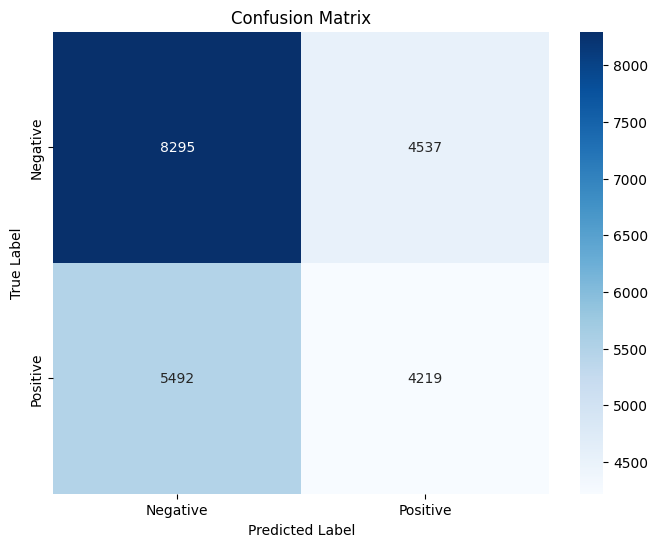

In [54]:
# Plotting the confusion matrix
NaiveBayes = confusion_matrix(y_test, y_pred_NaiveBayes)
plt.figure(figsize=(8, 6))
sns.heatmap(NaiveBayes, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [57]:
accuracy_NaiveBayes= accuracy_score(y_pred_NaiveBayes, y_test)
precision_NaiveBayes = precision_score(y_pred_NaiveBayes, y_test)
recall_NaiveBayes= recall_score(y_pred_NaiveBayes, y_test)
print(f"Accuracy: {accuracy_NaiveBayes}")
print(f"Precision: {precision_NaiveBayes}")
print(f"Recall: {recall_NaiveBayes}")

Accuracy: 0.5551168877256798
Precision: 0.4344557718051694
Recall: 0.48184102329830975


### 5. Support Vector Machines Linear

In [51]:
from sklearn.svm import LinearSVC
SVM = LinearSVC()

In [52]:
SVM.fit(x_train, y_train)

c:\Users\Admin\Desktop\S7\notebooks\.venv\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

In [53]:
# Predictions on the test set
y_pred_SVM = SVM.predict(x_test)

# Evaluation metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_SVM))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_SVM))
print("Accuracy:", accuracy_score(y_test, y_pred_SVM))

Confusion Matrix:
[[7179 5653]
 [ 723 8988]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.56      0.69     12832
           1       0.61      0.93      0.74      9711

    accuracy                           0.72     22543
   macro avg       0.76      0.74      0.72     22543
weighted avg       0.78      0.72      0.71     22543

Accuracy: 0.7171627556225879


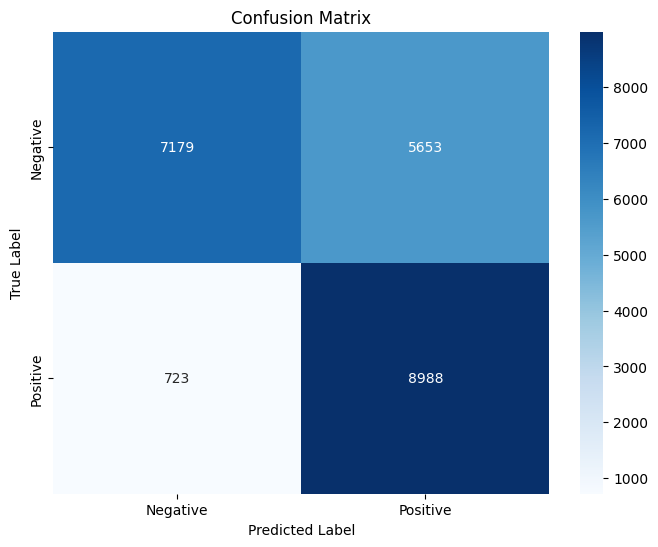

In [56]:
# Plotting the confusion matrix
SVM = confusion_matrix(y_test, y_pred_SVM)
plt.figure(figsize=(8, 6))
sns.heatmap(SVM, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [58]:
accuracy_SVM= accuracy_score(y_pred_SVM, y_test)
precision_SVM = precision_score(y_pred_SVM, y_test)
recall_SVM= recall_score(y_pred_SVM, y_test)
print(f"Accuracy: {accuracy_SVM}")
print(f"Precision: {precision_SVM}")
print(f"Recall: {recall_SVM}")

Accuracy: 0.7171627556225879
Precision: 0.9255483472350943
Recall: 0.6138924936821255
